In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 500)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
# # of parameters = 8320 = (32*32+32*32+32)*4
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 170ms/step - loss: 0.5368 - acc: 0.7453 - val_loss: 0.4017 - val_acc: 0.8460
Epoch 2/10
157/157 [==============================] - 26s 167ms/step - loss: 0.3172 - acc: 0.8734 - val_loss: 0.3138 - val_acc: 0.8674
Epoch 3/10
157/157 [==============================] - 26s 167ms/step - loss: 0.2385 - acc: 0.9095 - val_loss: 0.2891 - val_acc: 0.8798
Epoch 4/10
157/157 [==============================] - 26s 167ms/step - loss: 0.2024 - acc: 0.9272 - val_loss: 0.3505 - val_acc: 0.8674
Epoch 5/10
157/157 [==============================] - 26s 167ms/step - loss: 0.1759 - acc: 0.9372 - val_loss: 0.2864 - val_acc: 0.8906
Epoch 6/10
157/157 [==============================] - 26s 167ms/step - loss: 0.1607 - acc: 0.9442 - val_loss: 0.3191 - val_acc: 0.8744
Epoch 7/10
157/157 [==============================] - 27s 169ms/step - loss: 0.1437 - acc: 0.9498 - val_loss: 0.3142 - val_acc: 0.8854
Epoch 8/10
157/157 [==============================] - 2

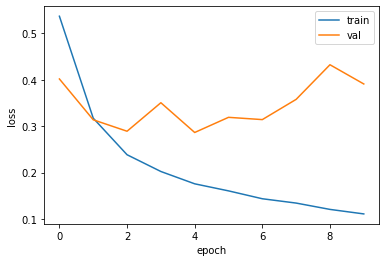

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 21s 27ms/step - loss: 0.4279 - acc: 0.8640


In [10]:
print('test_acc:', test_acc)

test_acc: 0.86464


In [18]:
model.predict(x_test[0:1])

array([[0.97308075, 0.02691921]], dtype=float32)

In [19]:
y_test[0]

0